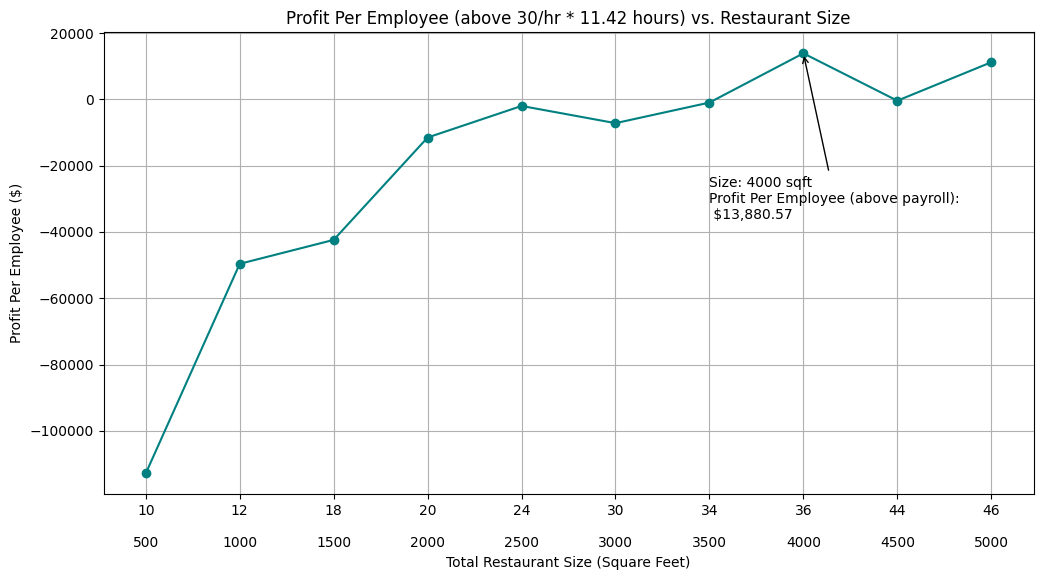

[10, 12, 18, 20, 24, 30, 34, 36, 44, 46] 36 employee count.  18 positions.
499,700.40 Annual profit
120 Seating Capacity
Times Seating Capacity turned per day:  3 for 360 customers/day.


In [2]:
#codebase by chatGPT 4o
#restaurant calculator by WFA3

import math
import matplotlib.pyplot as plt
import numpy as np

testwage=30 #30/hr bare min 2024
shift_multiplier=2 #two staff per position at an 80 hr position, 3.5 day weeks of 11.42hr days
ingredient_price=20
sale_price=74.05
startup_costs=425000
startup_costs_annual_payment=startup_costs*.05*12
ingredient_markup_percentage = 100*sale_price/ingredient_price

# Step 1: Define constants for average costs and parameters
rent_per_sqft = 7  # $ per square foot annually
utilities_per_sqft = 3  # $ per square foot annually
licenses_cost = 5000  # $ per year
times_seats_turned_per_day = 3
staff_wage = testwage  # $ per hour per server
chef_wage = testwage  # $ per hour per chef
host_wage = testwage  # $ per hour per host
busser_wage = testwage  # $ per hour per busser
manager_wage = testwage  # $ per hour per manager
hours_open = 11.42  # Hours open per day
days_open = 365  # Days open per year
seats_per_sqft = .6/20 #0.1  # Average number of seats per square foot  #60% dining area 20ft/seat
employer_cost_multiplier = 1.4  # Multiplier to account for employer's cost for taxes, benefits, etc.

# Staffing ratios
seats_per_server = 15  # Seats per server
seats_per_chef = 40  # Seats per chef
seats_per_host = 60  # Seats per host
seats_per_busser = 40  # Seats per busser
seats_per_manager = 100  # Seats per manager

# Step 2: Function to calculate overhead expenses
def calculate_overhead_expenses(sqft):
    rent = rent_per_sqft * sqft
    utilities = utilities_per_sqft * sqft
    total_overhead = rent + utilities + licenses_cost + startup_costs_annual_payment
    return total_overhead

# Step 3: Function to calculate revenue, profit, and detailed staff needs
def calculate_revenue_and_profit(sqft):
    # Calculate seating capacity based on square footage
    seating_capacity = sqft * seats_per_sqft
    total_covers = seating_capacity * times_seats_turned_per_day * days_open  
    
    # Revenue calculation
    revenue = total_covers * sale_price
    
    # Cost calculation
    meal_cost = total_covers * ingredient_price
    overhead_expenses = calculate_overhead_expenses(sqft)
    
    # Staff calculations based on seating capacity
    num_servers = math.ceil(seating_capacity / seats_per_server)
    num_chefs = math.ceil(seating_capacity / seats_per_chef)
    num_hosts = math.ceil(seating_capacity / seats_per_host)
    num_bussers = math.ceil(seating_capacity / seats_per_busser)
    num_managers = math.ceil(seating_capacity / seats_per_manager)
    
    # Total number of employees
    total_employees = (num_servers + num_chefs + num_hosts + num_bussers + num_managers) * shift_multiplier

    # Staff wage calculations with employer cost multiplier
    server_expenses = num_servers * staff_wage * employer_cost_multiplier * hours_open * days_open
    chef_expenses = num_chefs * chef_wage * employer_cost_multiplier * hours_open * days_open
    host_expenses = num_hosts * host_wage * employer_cost_multiplier * hours_open * days_open
    busser_expenses = num_bussers * busser_wage * employer_cost_multiplier * hours_open * days_open
    manager_expenses = num_managers * manager_wage * employer_cost_multiplier * hours_open * days_open
    total_staff_expenses = (server_expenses + chef_expenses + host_expenses + busser_expenses + manager_expenses) * shift_multiplier
    
    # Profit calculation
    profit = revenue - (meal_cost + overhead_expenses + total_staff_expenses)
    profit_per_employee = profit / total_employees if total_employees > 0 else profit
    return profit_per_employee,total_employees,profit,seating_capacity

# Step 4: Simulate profits per employee for different restaurant sizes
sqft_range = range(500, 5001, 500)  # Test sizes from 500 sqft to 10,000 sqft
profit_per_employee = []
total_employees,profits,seats = [],[],[]


for sqft in sqft_range:
    ppe,te,profit_temp,seat_temp = calculate_revenue_and_profit(sqft)
    profit_per_employee.append(ppe)
    total_employees.append(te)
    profits.append(profit_temp)
    seats.append(seat_temp)

# Step 5: Plot the results

plt.figure(figsize=(12, 6))
plt.plot(sqft_range, profit_per_employee, marker='o', color='teal')
plt.title("Profit Per Employee (above "+str(testwage)+"/hr * "+str(hours_open)+" hours) vs. Restaurant Size")
plt.xlabel("Total Restaurant Size (Square Feet)")
plt.ylabel("Profit Per Employee ($)")
plt.grid(True)
new_labels = [ ''.join([str(total_employees[x]),'\n\n'+str(sqft_range[x])]) for x in range(len(sqft_range)) ]
plt.xticks(sqft_range,new_labels)
#ax.set_xticklabels(total_employees)
# Highlight the best size
max_ppe = max(profit_per_employee)
optimal_size = sqft_range[profit_per_employee.index(max_ppe)]
plt.annotate(f'Size: {optimal_size} sqft\nProfit Per Employee (above payroll):\n ${max_ppe:,.2f}',
             xy=(optimal_size, max_ppe), xytext=(optimal_size -500, max_ppe - 50000),  #arrow text location
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.show()
print(total_employees,total_employees[profit_per_employee.index(max_ppe)], 'employee count. ',f'{(total_employees[profit_per_employee.index(max_ppe)]/shift_multiplier):.0f}','positions.')
print(f'{profits[profit_per_employee.index(max_ppe)]:,.2f}',"Annual profit")
print(f'{seats[profit_per_employee.index(max_ppe)]:.0f}',"Seating Capacity")
print("Times Seating Capacity turned per day: ",times_seats_turned_per_day,"for "+str(f'{(seats[profit_per_employee.index(max_ppe)]*times_seats_turned_per_day):.0f}')+" customers/day.")
